## Get a corpus of articles

In [4]:
import urllib3 as ul3
from bs4 import BeautifulSoup as bs
import certifi
http = ul3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())

In [83]:
url = 'https://developer.paciellogroup.com/blog/'

def get_url(url):
    req = http.request('GET',url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,'lxml')
    return soup

soup = get_url(url)
soup

<!DOCTYPE html>
<!--[if IE 7]>
<html class="ie ie7" lang="en-US">
<![endif]--><!--[if IE 8]>
<html class="ie ie8" lang="en-US">
<![endif]--><!--[if !(IE 7) | !(IE 8) ]><!--><html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>Blog | TPG – Digital Accessibility Solutions</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, shrink-to-fit=no" name="viewport"/>
<link href="https://developer.paciellogroup.com/feed/" rel="alternate" title="TPG" type="application/rss+xml"/>
<link href="https://developer.paciellogroup.com/feed/atom/" rel="alternate" title="TPG" type="application/atom+xml"/>
<meta content="#1b75bc" name="theme-color"/>
<link href="https://developer.paciellogroup.com/wp-content/themes/tpg2015/images/icon192x192.png" rel="icon" sizes="192x192"/>
<link href="https://developer.paciellogroup.com/wp-content/themes/tpg2015/images/icon192x192.png" rel="apple-touch-icon"/>
<meta content="The Paciello Group (TPG)" name="a

In [82]:
soup_look.h2.a['href']

'https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/'

In [73]:
links = []
def fetch_links(url):
    req = http.request('GET',url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,'lxml')
    all_h2 = soup.findAll('h2')
    for h in all_h2:
        links.append(soup.h2.a['href'])
    for c in soup.findAll('span'):
        try:
            n = c['class']
            if n == ['next']:
                fetch_links(c.a['href'])
        except:
            n = ""
    return set(links)

In [77]:
links = fetch_links('https://developer.paciellogroup.com/blog/')

In [87]:
links = [l for l in links]
links

['https://developer.paciellogroup.com/blog/2016/04/csun-2016-roundup/',
 'https://developer.paciellogroup.com/blog/2017/02/in-browser-spellchecking/',
 'https://developer.paciellogroup.com/blog/2014/04/global-considerations-creating-organizational-web-accessibility-policy/',
 'https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/',
 'https://developer.paciellogroup.com/blog/2016/01/simple-inline-error-message-pattern/',
 'https://developer.paciellogroup.com/blog/2011/04/html5-accessibility-chops-the-alt-decision/',
 'https://developer.paciellogroup.com/blog/2012/02/wcag-2-0-parsing-error-bookmarklet/',
 'https://developer.paciellogroup.com/blog/2008/05/making-twitter-tweet-using-the-tpg-notifier/',
 'https://developer.paciellogroup.com/blog/2017/03/sounding-out-the-web-accessibility-for-deaf-and-hard-of-hearing-people-part-2/',
 'https://developer.paciellogroup.com/blog/2016/02/short-note-on-use-of-alt-and-the-title-attribute/',
 'https://developer.paciellogroup

In [91]:
markup = get_url(links[0])

In [97]:
markup.article.text
    

'\nCSUN 2016 roundup\n\nPosted on Thursday, 21 April 2016 by Henny Swan\n\nCategory: Conferences \n\n\nWe had another great year at CSUN, the annual International Technology and Persons with Disabilities Conference, which is held in San Diego.\nIt’s always good to meet up with the members of the team, colleagues, and friends in the industry, and make new friends. This year TPG had a series of first, but that made it all the better. We welcomed our newest recruits, Michiel Bijl (complete with his dinosaur onesie), Adrian Roselli, and Jon Metz. All the UX team made it to the conference for the first time and helped run the CSUN 2016 UXathon. TPG announced a strategic partnership with NV Access. And last but not least, our fearless leader, Mike Paciello, won the Knowbility lifetime achievement award (29 minutes in).\nTPG was also out in force at various events including the CSUN Tweetup, Wendy Chisholm’s karaoke night, and the Viking and Lumberjack hangout.\nBut it wasn’t all karaoke and 

In [132]:
def get_article_text(article_url):
        req = http.request('GET',article_url)
        page = req.data.decode('utf-8','ignore')
        soup = bs(page,'lxml')
        article = markup.article.text.replace('\n',' ')
        article = article.replace('\xa0',' ')
        return article

In [133]:
a = get_article_text(links[2])

In [150]:
def get_corpus(ls):
    corp = []
    for a in ls:
         corp.append(get_article_text(a))
    return corp

In [153]:
corpus = get_corpus(links)

In [187]:
corpus_string = " ".join(corpus)

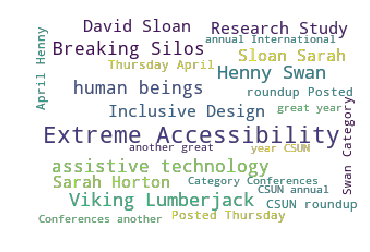

In [213]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=300, height=200,min_font_size=8, mode='RGBA', background_color=None).generate(corpus_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
WordCloud